<a href="https://colab.research.google.com/github/JoungMinJu/lab_study/blob/main/%EC%98%81%EC%96%B4%EC%99%80_%ED%95%9C%EA%B5%AD%EC%96%B4_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

영어 데이터를 다운 받아 직접 word2vec 진행
파이썬의 gensim 패키지에 Word2Vec 지원하는 중. 따라서 이거 이용하면 손쉽게 단어를 임베딩 벡터로 변환시킬 수 있다.
영어로 된 코퍼스를 다운받아 전처리를 수행하고, 전처리한 데이터를 바탕으로 Word2Vec 작업을 진행할 예정.

In [3]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize


In [4]:
#훈련 데이터 이해하기

# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f180f7f3190>)

In [ ]:
#훈련 데이터 파일이 xml 문법으로 작성되어있으므로 전처리가 필요하다
#얻고자하는 실질적 데이터는 <content></content> 사이의 내용임
#전처리 작업을 통해 xml 문법들은 제거하고 해다 ㅇ데이터만 가져와야한다.
#그리고 <content> 태그 내용 중에는 배경음을 나타내는 단어도 있어서 이를 제거해야한다.


In [5]:
#전처리
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]


print('총 샘플의 개수 : {}'.format(len(result)))


총 샘플의 개수 : 273424


In [6]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [7]:
#Word2Vec 훈련시키기
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

#size=워드 벡터의 특징값, 즉 임베딩 된 벡터의 차원
#window=컨텍스트의 윈도우 크기
# min_count= 단어 최소 빈도수 제한(빈도가 적은 단어들은 학습하지 않는다)
# sg=0은 CBOW, 1은 Skip-gram


In [8]:
model_result = model.wv.most_similar("man")  #가상 유사한 단어를 출력하는 메소드 
print(model_result)

[('woman', 0.8534703254699707), ('guy', 0.8199496269226074), ('lady', 0.8021755218505859), ('boy', 0.755974531173706), ('girl', 0.7472382187843323), ('gentleman', 0.7467151284217834), ('soldier', 0.7108455300331116), ('kid', 0.7029757499694824), ('poet', 0.6859697699546814), ('friend', 0.6757570505142212)]


In [9]:
#Word2Vec 모델 저장하고 로드하기

from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [10]:
#로드한 모델에 대해 다시 man과 유사한 단어 출력
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8534703254699707), ('guy', 0.8199496269226074), ('lady', 0.8021755218505859), ('boy', 0.755974531173706), ('girl', 0.7472382187843323), ('gentleman', 0.7467151284217834), ('soldier', 0.7108455300331116), ('kid', 0.7029757499694824), ('poet', 0.6859697699546814), ('friend', 0.6757570505142212)]


한국어 워투벡( 네이버 영화 리뷰)

In [11]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import urllib.request
 from gensim.models.word2vec import Word2Vec


ModuleNotFoundError: ignored

In [15]:
! pip install konlpy

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 27.4 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [16]:
from konlpy.tag import Okt


In [17]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [19]:
#null값 유무
print(train_data.isnull().values.any())

#리뷰개수
print(len(train_data))

True
200000


In [20]:
train_data=train_data.dropna(how='any') #null값 존재하는 행 제거
print(train_data.isnull().values.any())

False


In [21]:
print(len(train_data))

199992


In [22]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [24]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [25]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [26]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


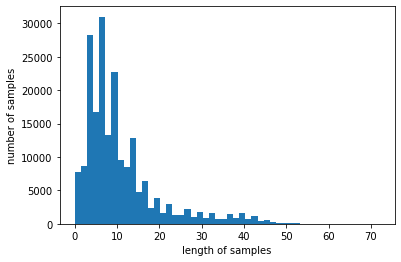

In [28]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [27]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [29]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape



(16477, 100)

In [30]:
print(model.wv.most_similar("최민식"))
print()
print()
print()
print(model.wv.most_similar("히어로"))

[('안성기', 0.8536623120307922), ('한석규', 0.8495540618896484), ('김승우', 0.8373202085494995), ('이민호', 0.8214137554168701), ('김수현', 0.8213430643081665), ('박중훈', 0.8199827671051025), ('윤제문', 0.8145754337310791), ('오광록', 0.8109836578369141), ('설경구', 0.8091718554496765), ('안소니', 0.8070521354675293)]



[('무협', 0.8704120516777039), ('호러', 0.8680425882339478), ('느와르', 0.861127495765686), ('슬래셔', 0.8358139395713806), ('물', 0.8326345682144165), ('블록버스터', 0.8303645253181458), ('물의', 0.823876142501831), ('무비', 0.8092905282974243), ('로코', 0.80302494764328), ('헐리우드', 0.8007727265357971)]
